<a href="https://colab.research.google.com/github/hemu2014/python-College-Algebra-with-Python/blob/main/%E8%AE%A1%E7%AE%97%E5%99%A8_Your_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportions

比例

Set up a proportion:<br>
$\frac{n1}{d1}=\frac{n2}{d2}$

In [ ]:
print("用0代表未知数X（比例计算器 a/b = c/d）")

# 获取用户输入
n1 = int(input('输入第一个分数的分子(a): '))
d1 = int(input('输入第一个分数的分母(b): '))
n2 = int(input('输入第二个分数的分子(c): '))
d2 = int(input('输入第二个分数的分母(d): '))

# 验证输入
zeros = [n1, d1, n2, d2].count(0) # 检测未知数的个数
print("未知数个数：", zeros)
if zeros != 1:
    print("错误：必须有且只有一个0作为未知数")
else:
    try:
        # 计算未知数的值
        if n1 == 0:  # 解a
            answer = d1 * n2 / d2
            print(f"解: a = {answer} (因为 {answer}/{d1} = {n2}/{d2})")
        elif d1 == 0:  # 解b
            answer = n1 * d2 / n2
            print(f"解: b = {answer} (因为 {n1}/{answer} = {n2}/{d2})")
        elif n2 == 0:  # 解c
            answer = d2 * n1 / d1
            print(f"解: c = {answer} (因为 {n1}/{d1} = {answer}/{d2})")
        elif d2 == 0:  # 解d
            answer = n2 * d1 / n1
            print(f"解: d = {answer} (因为 {n1}/{d1} = {n2}/{answer})")
    except ZeroDivisionError:
        print("错误：计算过程中出现意外除零错误（这不应该发生，请检查输入）")


用0代表未知数X（比例计算器 a/b = c/d）
输入第一个分数的分子(a): 12
输入第一个分数的分母(b): 23
输入第二个分数的分子(c): 45
输入第二个分数的分母(d): 0
未知数个数： 1
解: d = 86.25 (因为 12/23 = 45/86.25)


# Convert decimal to fraction and percent
将小数转换为分数和百分比


In [ ]:
# Get string input, which will include a decimal point
digits = input("Enter a decimal number to convert: ")  # 输入原始数据

digits_test = digits.split(".")
print(digits_test)  # 得到一个分割后的列表： 0.123==》 ["0", "123"]
# Get number of decimal places as an integer
exponent = int(len(digits_test[1]))  # 计算除去小数点的字符串个数

# Convert the input to a float number
n = float(digits) # 将输入转为浮点数

# Use the exponent to get the numerator
numerator = int(n * 10**exponent)  # 转为正数（0.123==》 123）

# Use the expoent to get the denominator
denominator = 10**exponent  # 分母 （0.123==》 1000）

# percent is the first two decimal places
percent = n * 100  # 转为百分比

# Output
print("The decimal is ", n)
print("The fraction is ", numerator, "/", denominator)
print("The percent is ", percent, " %")


Enter a decimal number to convert: 0.123
['0', '123']
The decimal is  0.123
The fraction is  123 / 1000
The percent is  12.3  %


# Solve for x
求解x

In [ ]:
import sympy
from sympy import symbols, sympify
from sympy.solvers import solve
import re  # 引入正则表达式库

x = symbols('x')

def preprocess_equation(eq_str):
    """预处理方程字符串，使其符合 sympy 语法"""
    # 替换 ^ 为 **（幂运算）
    eq_str = eq_str.replace('^', '**')

    # 使用正则表达式替换 数字x 为 数字*x（如 2x → 2*x）
    eq_str = re.sub(r'(\d+)x', r'\1*x', eq_str)  # 处理 2x, 3x 等
    eq_str = re.sub(r'(\d+)\s*x', r'\1*x', eq_str)  # 处理 2 x, 3 x 等

    # 防止开头 x 变成 *x（如 x+3 不能变成 *x+3）
    if eq_str.startswith('x'):
        eq_str = eq_str.replace('x', 'x', 1)  # 不做替换
    elif eq_str.startswith('*x'):
        eq_str = eq_str.replace('*x', 'x', 1)  # 修正错误的 *x

    # 关键改进：使用正则表达式处理 )( 或 ) (（带空格）
    eq_str = re.sub(r'\)\s*\(', ')*(', eq_str)  # 匹配 ) 和 ( 之间的任意空格

    return eq_str

# 用户输入方程
eq_input = input('Enter equation (e.g., 2x+3 or 2*x+3): 0 = ')
eq_processed = preprocess_equation(eq_input)

try:
    eq = sympify(eq_processed)  # 转换为 sympy 表达式
    solution = solve(eq, x)
    print("Processed equation:", eq)
    print("Solution:", solution)
    for i, s in enumerate(solution):  # 对多个解进行编号
        print(f"x{i+1} = ", s)
    factor = sympy.factor(eq)
    print("Factor:", factor, type(factor))

except Exception as e:
    print("Error:", e)
    print("Please check your input format (e.g., 2x+3 or 2*x+3).")

sympy.factor(eq)

Enter equation (e.g., 2x+3 or 2*x+3): 0 = 2x^2 + 2x - 4
Processed equation: 2*x**2 + 2*x - 4
Solution: [-2, 1]
x1 =  -2
x2 =  1
Factor: 2*(x - 1)*(x + 2) <class 'sympy.core.mul.Mul'>


2*(x - 1)*(x + 2)

# Factor an expression

因式分解表达式

In [ ]:
import sympy
from sympy import *
import math
# var('x y') 是 sympy 中用于同时定义多个符号变量的快捷方式，它等价于分别调用 x = symbols('x') 和 y = symbols('y')
var('x y') # 等价于 x, y = symbols('x y')
# var('x_1 x_2 alpha')  # 定义 x₁, x₂, α

# Equation to factor
eq = x**3 - 2*x**2 - 5*x + 6


sympy.factor(eq)


(x - 3)*(x - 1)*(x + 2)

# Solve for a variable
求解变量

In [ ]:
from sympy import *
import math

# Identify all variables
var('a b c d x') # 定义变量

# Left and right sides of the equal sign
left = 0
right = a*x**2 + b*x + c

# Variable to solve for
variable = x

# Sympy equation left = right
eq1 = Eq(left,right)

# Sympy solve for that variable
sol = solve(eq1,variable)

# Show factored results
for i, s in enumerate(sol):
    print(f"{variable}_{i+1}: {s}")


x_1: (-b - sqrt(-4*a*c + b**2))/(2*a)
x_2: (-b + sqrt(-4*a*c + b**2))/(2*a)


# 测试中文字体：

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

# 查看系统可用字体
print([f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Hei' in f.name])

# 设置字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']  # 优先使用雅黑，其次黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 示例绘图
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('中文标题示例')
plt.xlabel('X轴标签')
plt.ylabel('Y轴标签')
plt.show()

###可以

In [ ]:
from matplotlib.font_manager import FontProperties

# 指定字体文件路径（替换为你的实际字体路径）
#font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf', size=12)
font = FontProperties(fname='/content/msyh.ttc', size=12)
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('中文标题示例', fontproperties=font)
plt.xlabel('X轴标签', fontproperties=font)
plt.ylabel('Y轴标签', fontproperties=font)
plt.show()

# Slope-intercept equation from two points

两点式斜截方程

y =  1.8 x +  32.0
y=1.8x + 32.0


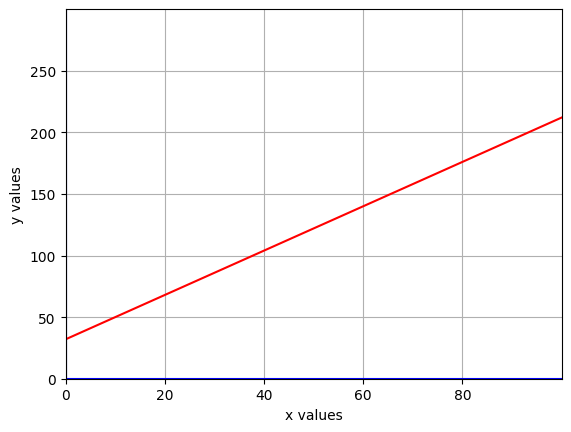

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x1 = 0
y1 = 32
x2 = 100
y2 = 212

# Develop the equation y = mx + b
m = (y2 - y1) / (x2 - x1)  # 斜率
b = y1 - m*x1  # 带入第一个点求出截距
print("y = ", m, "x + ", b)
print(f"y={m}x + {b}")
# For the graph, 画图，确定x,y轴范围
xmin = 0
xmax = 100
ymin = 0
ymax = 300

# For the line on the graph，x的最大最小对应的y值,计算x轴范围两端对应的y值
y3 = m*xmin + b
y4 = m*xmax + b

# Basic setup for the graph
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size， 窗口大小
plt.plot([xmin,xmax],[0,0],'b') # blue x axis # 绘制蓝色x轴
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# Add details to the graph
ax.set_xlabel("x values")  # 设置标签
ax.set_ylabel("y values")
ax.grid(True)  # 显示网格
ax.set_xticks(np.arange(xmin, xmax, 20))  # 设置x,y轴间距
ax.set_yticks(np.arange(ymin, ymax, 50))


# Plot the linear function as a red line
plt.plot([xmin,xmax],[y3,y4],'r')

plt.show()


###优化斜距方程：

<ipython-input-40-f76194e96ede>:63: UserWarning: Glyph 24050 (\N{CJK UNIFIED IDEOGRAPH-5DF2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-f76194e96ede>:63: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-40-f76194e96ede>:63: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24050 (\N{CJK UNIFIED IDEOGRAPH-5DF2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing fro

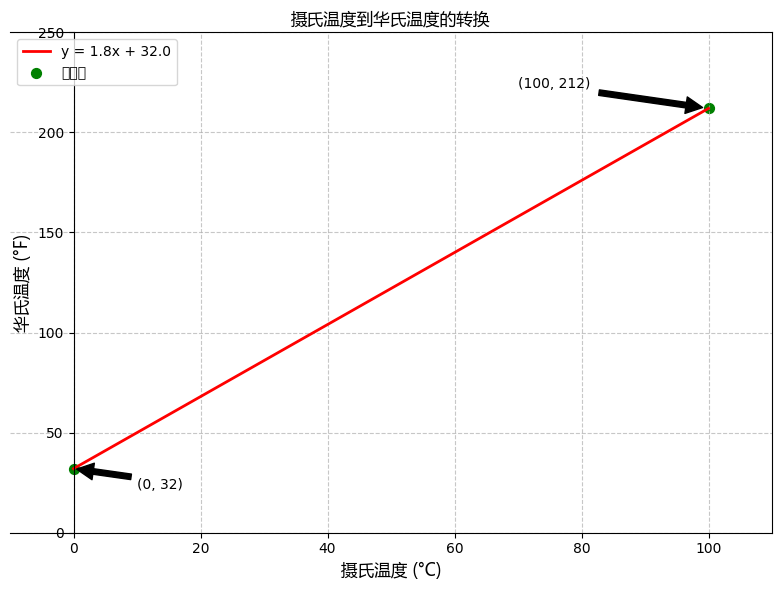

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 指定字体文件路径（替换为你的实际字体路径）
#font = FontProperties(fname='C:/Windows/Fonts/simhei.ttf', size=12)
font = FontProperties(fname='/content/msyh.ttc', size=12)
# 定义两个已知点
x1, y1 = 0, 32     # 摄氏0度 = 华氏32度
x2, y2 = 100, 212  # 摄氏100度 = 华氏212度

# 计算斜率和截距
m = (y2 - y1) / (x2 - x1)  # 斜率
b = y1 - m * x1            # 截距

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))

# 将左边框（y轴）移动到x=0位置
ax.spines['left'].set_position('zero')

# 设置坐标轴范围
ax.set_xlim(-10, 110)  # 稍微扩大范围以容纳标注
ax.set_ylim(0, 250)

# 绘制坐标轴
ax.axhline(0, color='b', linewidth=0.5)
ax.axvline(0, color='b', linewidth=0.5)

# 绘制线性函数
x_values = np.linspace(0, 100, 100)
y_values = m * x_values + b
ax.plot(x_values, y_values, 'r-', linewidth=2, label=f'y = {m:.1f}x + {b}')

# 标记原始数据点并添加坐标标注
ax.scatter([x1, x2], [y1, y2], color='green', s=50, label='已知点')

##添加坐标
# 方法1：使用annotate
# 在已知点旁边添加文本
#ax.text(x1, y1, f' ({x1}, {y1})', verticalalignment='bottom')
#ax.text(x2, y2, f' ({x2}, {y2})', verticalalignment='bottom')
'''
ax.annotate(f'({x1}, {y1})', (x1, y1), textcoords="offset points",
            xytext=(10,5), ha='left', fontsize=10)
ax.annotate(f'({x2}, {y2})', (x2, y2), textcoords="offset points",
            xytext=(10,5), ha='left', fontsize=10)
            '''
# 带箭头的标注
ax.annotate(f'({x1}, {y1})', xy=(x1, y1), xytext=(x1+10, y1-10),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate(f'({x2}, {y2})', xy=(x2, y2), xytext=(x2-30, y2+10),
            arrowprops=dict(facecolor='black', shrink=0.05))


# 添加图形元素
ax.set_title('摄氏温度到华氏温度的转换', fontsize=14, fontproperties=font)
ax.set_xlabel('摄氏温度 (°C)', fontsize=12, fontproperties=font)
ax.set_ylabel('华氏温度 (°F)', fontsize=12, fontproperties=font)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 25668 (\N{CJK UNIFIED IDEOGRAPH-6444}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 27663 (\N{CJK UNIFIED IDEOGRAPH-6C0F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-94f08f952a81>:48: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s

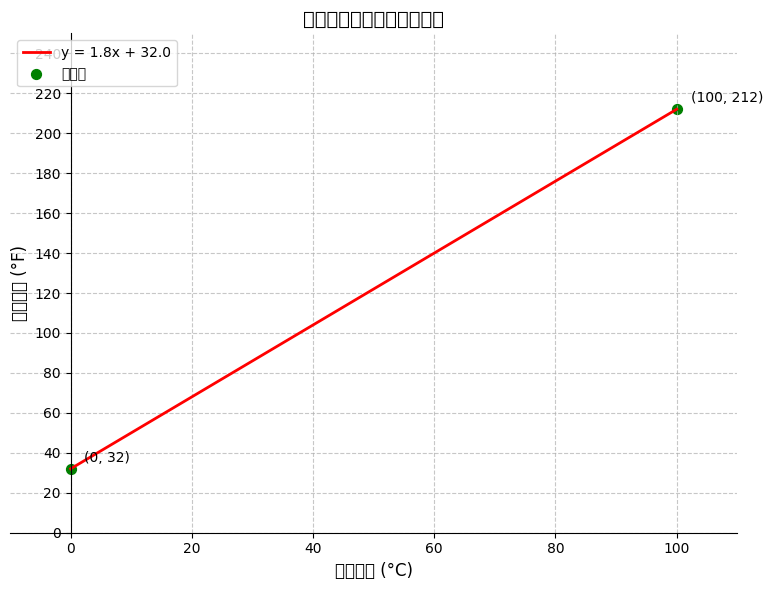

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义两个已知点
x1, y1 = 0, 32     # 摄氏0度 = 华氏32度
x2, y2 = 100, 212  # 摄氏100度 = 华氏212度

# 计算斜率和截距
m = (y2 - y1) / (x2 - x1)  # 斜率
b = y1 - m * x1            # 截距

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))

# 设置坐标轴范围 - 修正点1
ax.set_xlim(-10, 110)
ax.set_ylim(0, 250)

# 绘制坐标轴 - 修正点2
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 绘制线性函数
x_values = np.linspace(0, 100, 100)
y_values = m * x_values + b
ax.plot(x_values, y_values, 'r-', linewidth=2, label=f'y = {m:.1f}x + {b}')

# 标记原始数据点
ax.scatter([x1, x2], [y1, y2], color='green', s=50, label='已知点')
ax.annotate(f'({x1}, {y1})', (x1, y1), textcoords="offset points",
            xytext=(10,5), ha='left')
ax.annotate(f'({x2}, {y2})', (x2, y2), textcoords="offset points",
            xytext=(10,5), ha='left')

# 设置刻度 - 修正点3
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))

# 添加图形元素
ax.set_title('摄氏温度到华氏温度的转换', fontsize=14)
ax.set_xlabel('摄氏温度 (°C)', fontsize=12)
ax.set_ylabel('华氏温度 (°F)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Graph lines and zoom in or out

图形线条和放大或缩小

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Define the graphing function
def f(zoom):
    xmin = -zoom
    xmax = zoom
    ymin = -zoom
    ymax = zoom
    points = 10*xmax-xmin
    x = np.linspace(xmin, xmax, points)

    fig, ax = plt.subplots()
    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'black') # black x axis
    plt.plot([0,0],[ymin,ymax], 'black') # black y axis

    # Change y1 to be any function
    y1 = 3*x
    plt.plot(x, y1)
    #Plot another line here if you want
    y2 = -3*x
    plt.plot(x, y2)
    y3 = x**2 - 3
    plt.plot(x, y3)
    '''
    # 设置坐标轴范围
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # 绘制坐标轴
    ax.axhline(0, color='b', linewidth=0.5)
    ax.axvline(0, color='b', linewidth=0.5)

    # 绘制线性函数
    y1 = 3*x
    ax.plot(x, y1, 'r-', linewidth=2, label=f'y = 3x') #fixed this line
    y2 = -3*x
    ax.plot(x, y2, 'g-', linewidth=2, label=f'y = -3x') '''

    # 设置标签与标题
    ax.set_xlabel("x values")
    ax.set_ylabel("y values")
    ax.set_title("Some Graph")
    ticks = int(round((xmax-xmin)/10))
    ax.set_xticks(np.arange(xmin, xmax, ticks))  # 设置间距（5： 1， 10; 2, 15: 3）
    ax.set_yticks(np.arange(ymin, ymax, ticks))
    ax.grid(True)  # 显示网格
    plt.show()

    # 设置标签与标题
    ax.set_xlabel("x values")
    ax.set_ylabel("y values")
    ax.set_title("Some Graph")
    ticks = int(round((xmax-xmin)/10))
    ax.set_xticks(np.arange(xmin, xmax, ticks))  # 设置间距（5： 1， 10; 2, 15: 3）
    ax.set_yticks(np.arange(ymin, ymax, ticks))
    ax.grid(True)  # 显示网格
    plt.show()

# Set up the slider 设置滑块
interactive_plot = interactive(f, zoom=(1,100)) # 第一个参数是函数入口，第二个参数就是传给函数的值
interactive_plot


interactive(children=(IntSlider(value=50, description='zoom', min=1), Output()), _dom_classes=('widget-interac…

# Solve and graph a system equations

求解并绘制方程组图

<class 'sympy.sets.sets.FiniteSet'> {(1 - sqrt(5), -3 + 2*sqrt(5)), (1 + sqrt(5), -2*sqrt(5) - 3)}
Solution_0 = (1 + sqrt(5), -2*sqrt(5) - 3)
Solution_1 = (1 - sqrt(5), -3 + 2*sqrt(5))
[-2*x - 1] <class 'list'>
y =  -2*x - 1
y =  3 - x**2


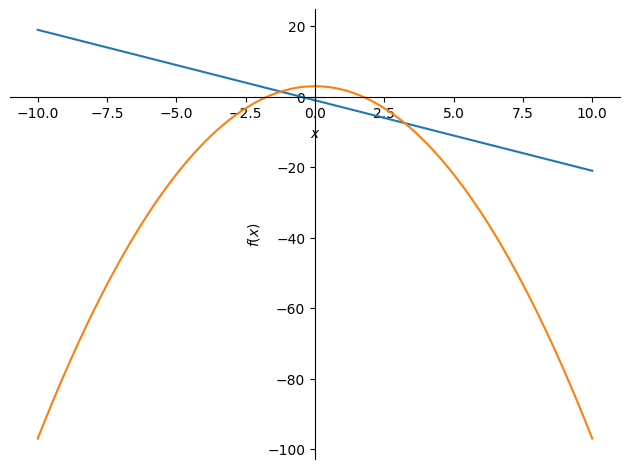

In [ ]:
from sympy import *
from sympy.plotting import plot
from sympy import sqrt

var('x y')

# First equation set equal to zero, ready to solve
first = 2*x + 1 + y


# Second equation set equal to zero, ready to solve
second = x**2 -3 + y


# Solve - can be linear or nonlinear equations
solution = nonlinsolve([first, second], (x, y))
print(type(solution), solution)  #<class 'sympy.sets.sets.FiniteSet'>一个集合，元素是一个元组类型（x, y）
for a in range(len(solution.args)):  #len(solution.args),有几个解
    x_solution = solution.args[a][0]  # 取相应的x坐标
    y_solution = solution.args[a][1]  # 取相应的y坐标
    print(f"Solution_{a} = ({x_solution}, {y_solution})")

# Sympy syntax for equation equal to zero, ready to factor
y_first = Eq(first,0) # 2*x + 1 + y =0

# Sympy solve for y
y1 = solve(y_first,y) # 求解y: y=-2*x - 1

# Same two steps for second equation
y_second = Eq(second,0)  # x**2 -3 + y=0

y2 = solve(y_second,y)  # y=3 - x**2
print(y1, type(y1))
# Show factored results
print("y = ", y1[0])  # y1与y2是一个解的list,取第一个结果
print("y = ", y2[0])

# Plot solution
x = symbols('x')
xmin = -10
xmax = 10
plot(y1[0], y2[0], (x,xmin,xmax))



###优化，显示交点坐标

solve = (3, 4)
solve = (4, 3)


<lambdifygenerated-34>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(25 - x**2)
<lambdifygenerated-35>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(25 - x**2)


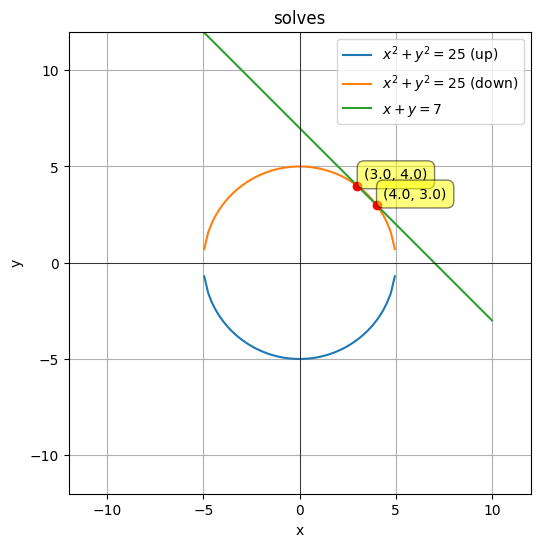

In [ ]:
from sympy import *
from sympy.plotting import plot
import matplotlib.pyplot as plt  # 直接使用 Matplotlib 进行标注

# 定义符号变量
x, y = symbols('x y')

# 定义两个方程（示例：一个圆和一条直线）
first = x**2 + y**2 - 25  # 圆：x² + y² = 25
second = x + y - 7         # 直线：x + y = 7

# 解方程组
solutions = nonlinsolve([first, second], (x, y))

# 提取所有实数解
solution_points = []
for sol in solutions:
    '''
    if all(s.is_real for s in sol):  # 确保解是实数
        x_sol, y_sol = sol
        solution_points.append((x_sol, y_sol))
        print(f"solve = ({x_sol.evalf(2)}, {y_sol.evalf(2)})")
    '''
    solution_points.append(sol)
    print(f"solve = ({sol[0]}, {sol[1]})")

# 将方程转换为 y = f(x) 形式
y1 = solve(Eq(first, 0), y)  # y = ±√(25 - x²)
y2 = solve(Eq(second, 0), y) # y = 7 - x

# 使用 Matplotlib 绘制
import numpy as np

# 定义 x 的范围
x_vals = np.linspace(-10, 10, 100)

# 计算 y 值
#lambdify(x, y1[0], 'numpy') 将 SymPy 表达式转换为 NumPy 可计算的函数。
y1_upper = lambdify(x, y1[0], 'numpy')(x_vals)  # 圆的上半部分
y1_lower = lambdify(x, y1[1], 'numpy')(x_vals)  # 圆的下半部分
y2_line = lambdify(x, y2[0], 'numpy')(x_vals)   # 直线

# 创建图形
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_upper, label='$x^2 + y^2 = 25$ (up)')
plt.plot(x_vals, y1_lower, label='$x^2 + y^2 = 25$ (down)')
plt.plot(x_vals, y2_line, label='$x + y = 7$')

# 标注交点
for (x_val, y_val) in solution_points:
    x_float = float(x_val.evalf())
    y_float = float(y_val.evalf())
    plt.plot(x_float, y_float, 'ro')  # 红色点标记交点
    plt.annotate(
        f'({x_val.evalf(2)}, {y_val.evalf(2)})',
        xy=(x_float, y_float),
        xytext=(5, 5),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
    )

# 设置图形属性
plt.xlabel('x')
plt.ylabel('y')
plt.title('solves')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal')  # 确保x和y轴比例相同，这样圆就会显示为正圆，而不是椭圆。
plt.grid(True)
plt.legend()
plt.ylim(-12, 12)
plt.xlim(-12, 12)

# 显示图形
plt.show()

solve = (3.0, 4.0)
solve = (4.0, 3.0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

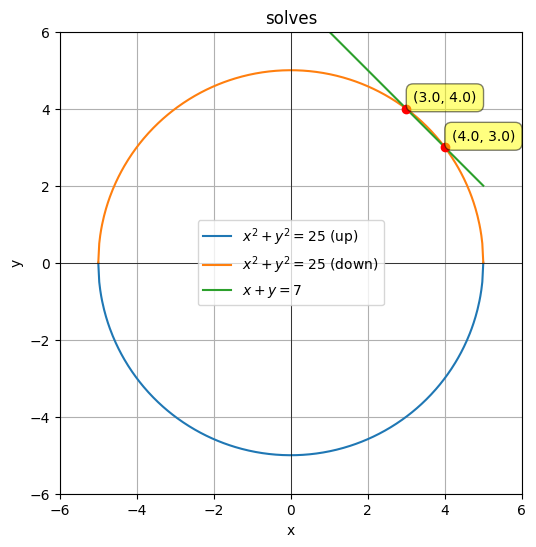

In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
# 定义符号变量
x, y = symbols('x y')

# 定义方程
first = x**2 + y**2 - 25  # 圆：x² + y² = 25
second = x + y - 7         # 直线：x + y = 7

# 解方程组
solutions = nonlinsolve([first, second], (x, y))

# 提取实数解
solution_points = []
for sol in solutions:
    if all(s.is_real for s in sol):
        x_sol, y_sol = sol
        solution_points.append((x_sol, y_sol))
        print(f"solve = ({x_sol.evalf(2)}, {y_sol.evalf(2)})")

# 转换为 y = f(x)
y1 = solve(Eq(first, 0), y)  # y = ±√(25 - x²)
y2 = solve(Eq(second, 0), y) # y = 7 - x

# 定义 x 范围（限制在圆的定义域内 [-5, 5]）
x_vals = np.linspace(-5, 5, 400)

# 计算 y 值
y1_upper = lambdify(x, y1[0], 'numpy')(x_vals)  # y = +√(25 - x²)
y1_lower = lambdify(x, y1[1], 'numpy')(x_vals)  # y = -√(25 - x²)
y2_line = lambdify(x, y2[0], 'numpy')(x_vals)   # y = 7 - x

'''
这样，Matplotlib 会自动跳过无效值，不会绘制 ∣x∣>5 的部分。也可以直接限制 x_vals 的范围为 [-5, 5]（推荐更简单的方法）。
y1_upper = np.where(x_vals**2 <= 25, lambdify(x, y1[0], 'numpy')(x_vals), np.nan) #x_vals**2<=25，生成一个布尔数组
y1_lower = np.where(x_vals**2 <= 25, lambdify(x, y1[1], 'numpy')(x_vals), np.nan)
'''
# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_upper, label='$x^2 + y^2 = 25$ (up)')
plt.plot(x_vals, y1_lower, label='$x^2 + y^2 = 25$ (down)')
plt.plot(x_vals, y2_line, label='$x + y = 7$')

# 标注交点
for (x_val, y_val) in solution_points:
    x_float = float(x_val.evalf())
    y_float = float(y_val.evalf())
    plt.plot(x_float, y_float, 'ro')  # 红色点标记交点
    plt.annotate(
        f'({x_val.evalf(2)}, {y_val.evalf(2)})',
        xy=(x_float, y_float),
        xytext=(5, 5),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5)
    )

# 设置图形
plt.xlabel('x')
plt.ylabel('y')
plt.title('solves')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.ylim(-6, 6)
plt.xlim(-6, 6)
plt.gca().set_aspect('equal')  # 关键：确保 x 和 y 轴比例相同
plt.savefig("abc.png") # 保存文件

plt.show()

files.download("abc.png")

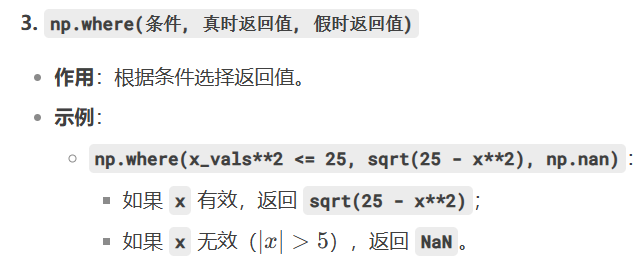

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
print(np.where(x>3))
print(np.where(x>3)[0], type(np.where(x>3)[0]))
x>3  # 返回一个布尔数组

(array([3, 4]),)
[3 4] <class 'numpy.ndarray'>


array([False, False, False,  True,  True])

# Save graph and download image
保存与下载图像

In [ ]:
# use this when graphing

from google.colab import files

# to save and output graph
plt.savefig("abc.png")
plt.show()
files.download("abc.png")


<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Quadratic Functions - roots, vertext, graph
二次函数 - 根，顶点，图

a = 1
b = 4
c = -3
y =  1 x**2 +  4 x +  -3
y = 1x**2 + 4x + -3
Vertex: ( -2.0 , -7.0 )
Vertex: (-2.0, -7.0)
Roots: x1 =  0.6457513110645907  and x2 =  -4.645751311064591


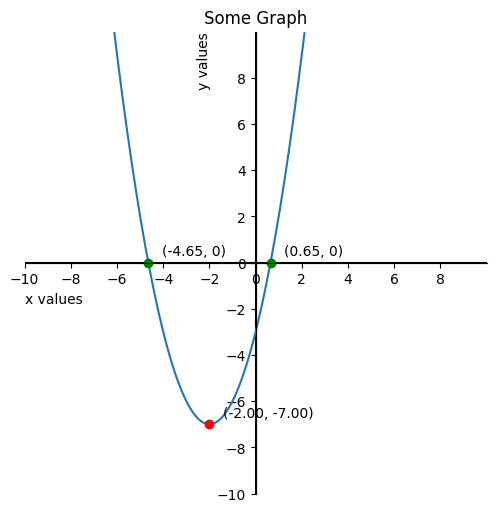

"\nplt.axis([xmin,xmax,ymin,ymax]) # window size\nplt.plot([xmin,xmax],[0,0],'b') # blue x axis\nplt.plot([0,0],[ymin,ymax], 'b') # blue y axis\n\n# Graph the parabola\ny1 = a*x**2 + b*x + c\nplt.plot(x, y1)\n\n# Plot the vertex\nplt.plot([vx],[vy], 'ro') # 绘制顶点\n\n# Plot the roots\nplt.plot([root_1, root_2],[0,0], 'go') # 绘制根\n\nplt.show()"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the three coefficients here
a = int(input("a = "))
b = int(input("b = "))
c = int(input("c = "))

print("y = ", a, "x**2 + ", b, "x + ", c)
print(f"y = {a}x**2 + {b}x + {c}")
# Vertex
vx = -b/(2*a) # 定点：斜率为0的点， 2ax+b=0
vy = a*(vx**2) + b*vx + c  # 将vx带入函数求对应的y值
print("Vertex: (",vx,",",vy,")")
print(f"Vertex: ({vx}, {vy})")
# Roots
d = b**2 - 4*a*c  # △ = b^2 - 4ac，判断根的个数
roots = []
if d>0:
    root_1 = (-b + math.sqrt(d))/(2*a)
    root_2 = (-b - math.sqrt(d))/(2*a)
    roots.append(root_1)
    roots.append(root_2)
    print("Roots: x1 = ", root_1, " and x2 = ", root_2)
elif d==0:
    root = (-b + math.sqrt(d))/(2*a)
    roots.append(root)
    print(f"Roots: x = {root}")
else:
    print("No real roots")

xmin = -10
xmax = 10
ymin = -10
ymax = 10
points = 10*(xmax-xmin)
x = np.linspace(xmin,xmax,points)

fig, ax = plt.subplots(figsize=(10, 6))
# 绘制坐标轴 - 修正点2
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
ax.spines['right'].set_visible(False)     # 隐藏右侧边框
ax.spines['top'].set_visible(False)       # 隐藏顶部边框

ax.set_aspect('equal') #y轴与x轴比例相同
#
# 设置坐标轴范围
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
# 设置 x与y轴
ax.axhline(y=0, color='k') # x axis
ax.axvline(x=0, color='k') # y axis

y1 = a*x**2 + b*x + c
ax.plot(x, y1)

# Plot the vertex
ax.plot([vx],[vy], 'ro') # 绘制顶点

# Plot the roots
if len(roots) > 1:
    ax.plot([roots[0], roots[1]],[0,0], 'go') # 绘制根
    # 将根转换为 Decimal 对象
    # decimal_root = Decimal(roots[0]).quantize(Decimal("0.01"))
    # rounded_root = round(roots[0], 2)
    # 使用 :.2f 格式说明符保留两位小数
    ax.annotate(f'({roots[0]:.2f}, 0)', (roots[0], 0), textcoords="offset points",
            xytext=(10,5), ha='left')
    ax.annotate(f'({roots[1]:.2f}, 0)', (roots[1], 0), textcoords="offset points",
            xytext=(10,5), ha='left')
    ax.annotate(f'({vx:.2f}, {vy:.2f})', (vx, vy), textcoords="offset points",
        xytext=(10,5), ha='left')
else:
    ax.plot([roots[0]],[0], 'go') # 绘制根
    # 只需绘制一个根和顶点重合
  #  ax.annotate(f'({roots[0]}, 0)', (roots[0], 0), textcoords="offset points",
  #          xytext=(10,5), ha='left')
    ax.annotate(f'({vx:.2f}, {vy:.2f})', (vx, vy), textcoords="offset points",
        xytext=(10,5), ha='left')

# 设置标签与标题
ax.set_xlabel("x values",loc="left")
ax.set_ylabel("y values", loc="top")
ax.set_title("Some Graph")
ticks = int(round((xmax-xmin)/10))
ax.set_xticks(np.arange(xmin, xmax, ticks))  # 设置间距（5： 1， 10; 2, 15: 3）
ax.set_yticks(np.arange(ymin, ymax, ticks))
ax.grid(False)  # 显示网格
plt.show()
#fig.savefig("abc.png") # 保存文件

#files.download("abc.png")

'''
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis

# Graph the parabola
y1 = a*x**2 + b*x + c
plt.plot(x, y1)

# Plot the vertex
plt.plot([vx],[vy], 'ro') # 绘制顶点

# Plot the roots
plt.plot([root_1, root_2],[0,0], 'go') # 绘制根

plt.show()'''

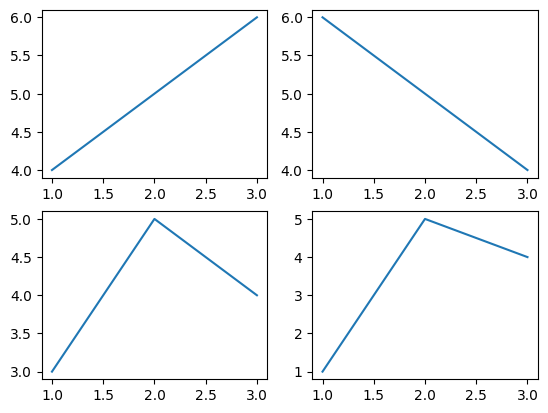

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

# 添加第一个坐标轴到左上角
ax1 = fig.add_subplot(221)
ax1.plot([1, 2, 3], [4, 5, 6])  # 在第一个坐标轴上绘制

# 添加第二个坐标轴到右上角
ax2 = fig.add_subplot(222)
ax2.plot([1, 2, 3], [6, 5, 4])  # 在第二个坐标轴上绘制

# ... 可以继续添加 ax3 和 ax4 ...
ax3 = fig.add_subplot(223)
ax3.plot([1, 2, 3], [3, 5, 4])  # 在第二个坐标轴上绘制
ax4 = fig.add_subplot(224)
ax4.plot([1, 2, 3], [1, 5, 4])  # 在第二个坐标轴上绘制
plt.show()

Quadratic graph with sliders

二次函数图，带有滑块

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import math

# All graphing happens in this function
def f(a,b,c):
    xmin = -10
    xmax = 10
    ymin = -10
    ymax = 10
    points = 10*(xmax-xmin)
    x = np.linspace(xmin,xmax,points)

    plt.axis([xmin,xmax,ymin,ymax]) # window size
    plt.plot([xmin,xmax],[0,0],'b') # x axis
    plt.plot([0,0],[ymin,ymax], 'b') # y axis

    # Parabola
    y1 = a*x**2 + b*x + c
    plt.plot(x, y1)

    # Vertex
    vx = -b/(2*a)
    vy = a*(vx**2) + b*vx + c
    plt.plot([vx],[vy], 'ro')

    # Roots
    d = b**2 - 4*a*c
    if d>=0:
        root_1 = (-b + math.sqrt(d))/(2*a)
        root_2 = (-b - math.sqrt(d))/(2*a)
        plt.plot([root_1, root_2],[0,0], 'go')

    # Set the equation as the title
    # 设置方程为标题
    sa = str(a)
    sb = str(b)
    sc = str(c)
    h1 = "y = ", sa, "x**2 + ", sb, "x + ", sc
    h2 = ""
    for w in h1:
        h2 = h2 + w

    plt.title(h2)
    plt.show()

# Interactive creates sliders for a, b, and c values
#交互式创建 a、b 和 c 值的滑块
interactive_plot = interactive(f, a=(1, 9), b=(-9,9), c=(-9,9))
interactive_plot



interactive(children=(IntSlider(value=5, description='a', max=9, min=1), IntSlider(value=0, description='b', m…

# Parent graphs 父图

Notice that Python already includes some math functions, and some functions require you to `import numpy as np` to solve or graph them.<p>
注意，Python 已经包含了一些数学函数，而一些函数需要导入 numpy 作为 np 来解决或绘制它们。
<table>
<tr><td>Math notation</td><td> Python notation </td></tr>
<tr><td> y = x</td><td> y = x</td></tr>
<tr><td> y = x<sup>2</sup></td><td> y = x**2 </td></tr>
<tr><td> y = x<sup>3</sup></td><td> y = x**3 </td></tr>
<tr><td> y = |x|</td><td> y = abs(x) </td></tr>
<tr><td> y =  $\sqrt{x}$</td><td> y = np.sqrt(x) </td></tr>
<tr><td> y = x<sup>1/3</sup></td><td> y = np.cbrt(x) </td></tr>
<tr><td> y = $\lfloor x \rfloor$</td><td> y = np.floor(x) </td></tr>
<tr><td> y = 2<sup>x</sup></td><td> y = 2**x </td></tr>
<tr><td> y = e<sup>x</sup></td><td> y = math.e**2 </td></tr>
<tr><td> y = ln(x)</td><td> y = np.log(x) </td></tr>
<tr><td> y = log<sub>2</sub>(x)</td><td> y = np.log2(x) </td></tr>
<tr><td> y = log(x)</td><td> y = np.log10(x) </td></tr>

# Compound interest calculator

复利计算器

When the compunding happens <i>n</i> times per year:<br>
当每年复合 n 次时：
Annuity = P(1 +  $\frac{r}{n})^{nt}$<p>
When the growth is continuous: <br>
当增长是连续的：
Annuity = Pe<sup>rt</sup>

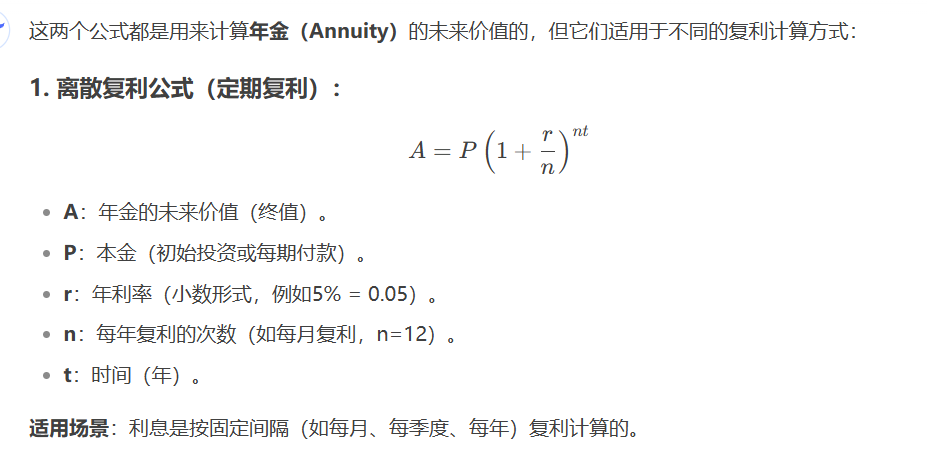
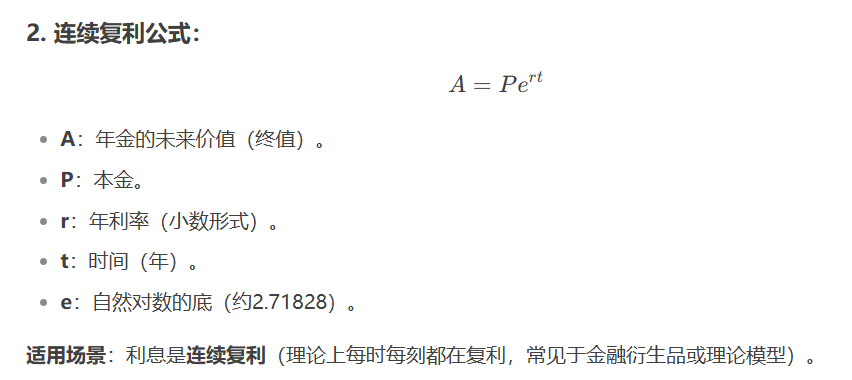

In [ ]:
import math

# Change these variables
p = 1
r = .01
t = 1
n = 1

n_times = p*(1+(r/n))**(n*t)
continuous = p*math.e**(r*t)

print("Annuity when compounded ", n, " times per year = ", n_times)
print("Annuity when compounded continuously = ", continuous)



Annuity when compounded  1  times per year =  1.01
Annuity when compounded continuously =  1.010050167084168


# Investment annuity estimator

投资年金估算器



Calculte the value in a retirement account, given regular monthly contributions and an estimated rate of increase
计算退休账户的价值，给定定期月供和估计的增长率

这段代码是用 Python 计算年金（Annuity）的未来价值，并估算每年产生的利息收入。它的逻辑是模拟每月定投（如基金定投、养老金储蓄）并计算复利增长。

In [ ]:
# Change these variables
p = 1000
r = .08
t = 38
monthly = 350

# The loop will update this variable
annuity = p

# loop for contribution and percent growth
for a in range(12*t):  # 12t，一共有多少个月份
    annuity = (annuity+monthly)*(1+(r/12))

print("annuity = ", round(annuity, 2))  # 年金

#假设不再新增投资，仅靠当前余额按 8% 年利率产生的年利息（annuity × r）。
print("Annual income from interest = ", round(annuity*r, 2))


annuity =  1061597.32
Annual income from interest =  84927.79


# Mortgage payment calculator房贷计算器


Mortgage payment formula:<p>
房贷还款公式：
monthly payment = P$\frac{\frac{r}{12}(1 + \frac{r}{12})^{12t}}{(1 + \frac{r}{12})^{12t} - 1}$
每月还款额

p：贷款总额（例如 30 万元）。

r：年利率（8%）。

t：贷款年限（30 年）。
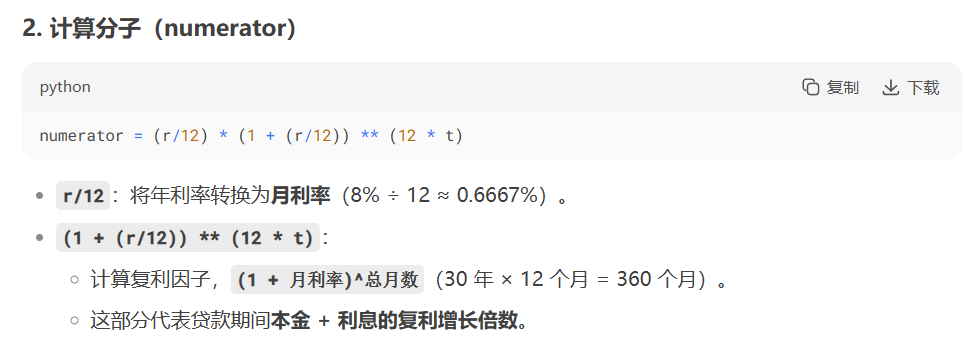
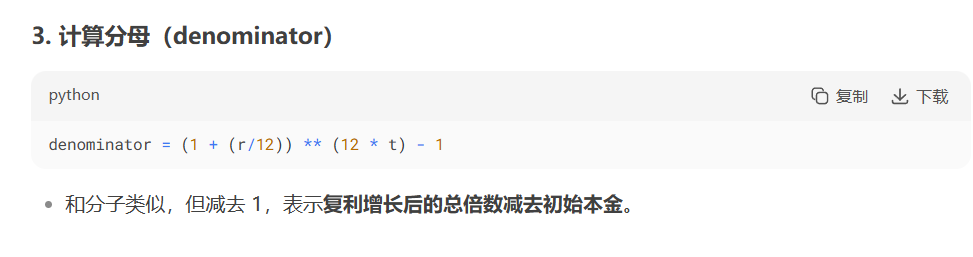
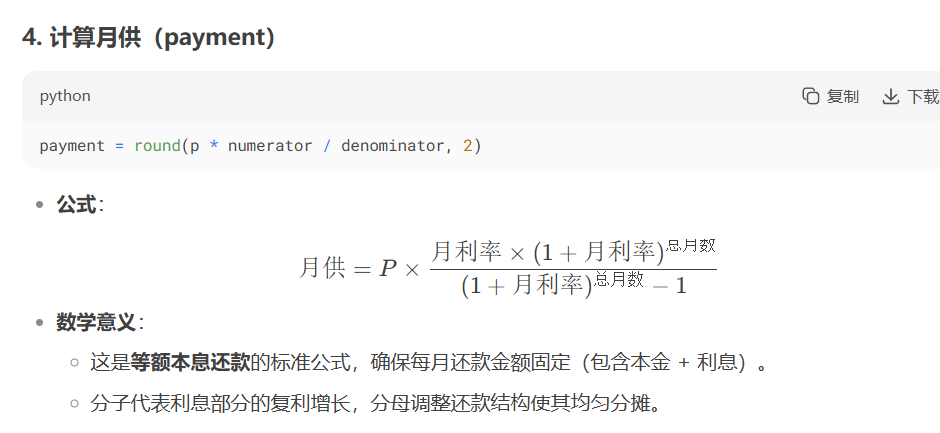
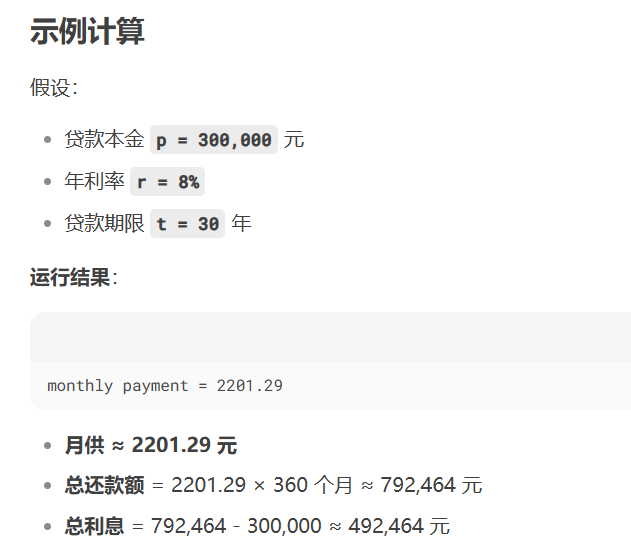
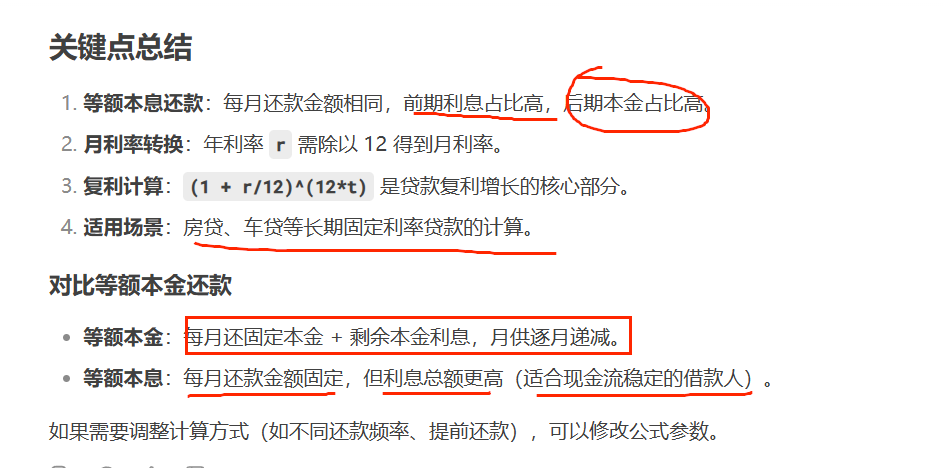

In [ ]:
# Change these values
p = 300000
r = .08
t = 30

# Break down that formula into parts
numerator = (r/12)*(1+(r/12))**(12*t)  # 分子
denominator = (1+(r/12))**(12*t) - 1  # 分母
payment = round(p*numerator/denominator, 2)

print("monthly payment = ", payment)

monthly payment =  2201.29


# Graphing data from a table从表格中绘制数据



This code will give you the imports you need, and you will see several ways to get a .csv file from other sources. comment out the code you don't need. Run this once, then you can run the next code cell several times.

这段代码将为您提供所需的导入，您将看到从其他来源获取 .csv 文件的好几种方法。不需要的代码请取消注释。运行一次后，您就可以多次运行下一个代码单元格。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# dialog to upload from computer:
# uploaded = files.upload()
# file_name = next(iter(uploaded))
# table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))

# example url:
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/faithful.csv"

# Dialog to input a url #对话框输入网址，输入 URL 的对话框
# url = input("URL of the csv: ")
table_1 = pd.read_csv(url, index_col=0)
table_1.head()

,"""Eruption length (mins)""",Eruption wait (mins)
Index,,
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [ ]:
table_1.shape

(272, 2)

In [ ]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 1 to 272
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    "Eruption length (mins)"  272 non-null    float64
 1   Eruption wait (mins)       272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [ ]:
table_1.describe()

,"""Eruption length (mins)""",Eruption wait (mins)
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


This code will grab data from columns in a table and convert them to arrays to graph. This example uses data related to the Old Fatithful geyser. Run this, modify it, and look for patterns.

这段代码将从表中的列中抓取数据，并将其转换为数组，然后绘制成图表。此示例使用与 Old Fatithful 间歇泉相关的数据。运行此代码，修改它，并寻找其中的规律。

In [ ]:
table_1.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272],
      dtype='int64', name='Index', length=272)

In [ ]:
type(table_1.index)

pandas.core.indexes.base.Index

        "Eruption length (mins)"  Eruption wait (mins)
Index                                                 
1                          3.600                    79
2                          1.800                    54
3                          3.333                    74
4                          2.283                    62
5                          4.533                    85


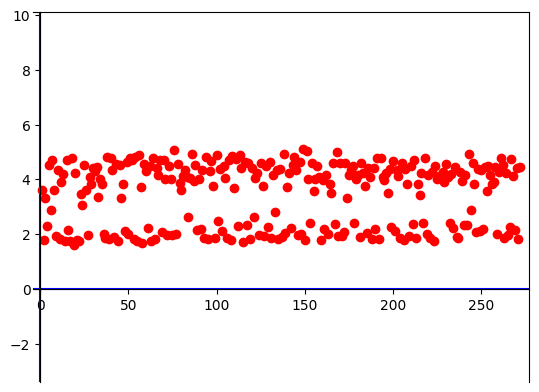

"\nplt.axis([xmin,xmax,ymin,ymax]) # window size\nplt.plot([xmin,xmax],[0,0],'b') # blue x axis\nplt.plot([0,0],[ymin,ymax], 'b') # blue y axis\nplt.plot(x,y,'ro') # make it scatterplot or line graph\nplt.show()\n"

In [ ]:
# Get the headers
print(table_1.head())

# Describe is also a good feature
# table_1[' "Eruption length (mins)"'].describe()
# table_1['Index'].describe()

# Convert values to numpy arrays to graph
# 将数据转为numpy数组
x = table_1.index.to_numpy()
y = table_1[' "Eruption length (mins)"'].to_numpy()

# Graph dimensions
xmin = x.min() - 5
xmax = x.max() + 5
ymin = y.min() - 5
ymax = y.max() + 5

fig, ax = plt.subplots()

# 绘制坐标轴 - 修正点2
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.spines['right'].set_visible(False)     # 隐藏右侧边框
#ax.spines['top'].set_visible(False)       # 隐藏顶部边框
# 设置坐标轴范围
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# 绘制x,y轴
ax.axhline(y=0, color='b')
ax.axvline(x=0, color='b')
# 绘制图像
ax.plot(x, y, 'ro')
plt.show()
'''
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'b') # blue x axis
plt.plot([0,0],[ymin,ymax], 'b') # blue y axis
plt.plot(x,y,'ro') # make it scatterplot or line graph
plt.show()
'''

#Add your own formulas